In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
###############################
# AGCOM
xls = pd.ExcelFile('dati/dati AgComTRIM.xlsx')
pss = pd.read_excel(xls, 'Principali serie storiche')
# pss

In [6]:
ftth_perc = pss.iloc[5]
fttc_perc = pss.iloc[4]
fwa_perc = pss.iloc[6]
rame_perc = pss.iloc[3]

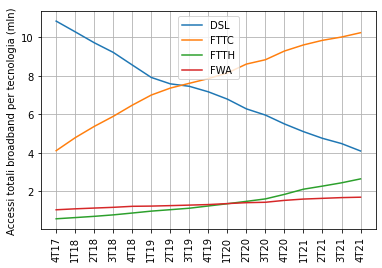

In [7]:
dsl_perc_bb = pss.iloc[8]
fttc_perc_bb = pss.iloc[9]
ftth_perc_bb = pss.iloc[10]
fwa_perc_bb = pss.iloc[11]

plt.xticks(rotation=90)
plt.plot(dsl_perc_bb[1:], label = 'DSL')
plt.plot(fttc_perc_bb[1:], label = 'FTTC')
plt.plot(ftth_perc_bb[1:], label = 'FTTH')
plt.plot(fwa_perc_bb[1:], label = 'FWA')
plt.ylabel('Accessi totali broadband per tecnologia (mln)')
plt.legend()
plt.grid(True)
plt.savefig('1.2.accessi__bb_mln_per_tecnologia.svg')

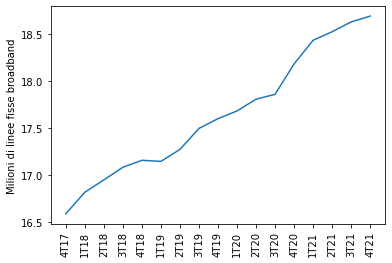

In [10]:
# Numero totale linee fisse broadband
plt.xticks(rotation=90)
tot_linee_fisse_mln_bb = pss.iloc[7]
plt.plot(tot_linee_fisse_mln_bb[1:])
plt.ylabel('Milioni di linee fisse broadband')
plt.savefig('1.2.milioni_linee_fisse_bb.svg')

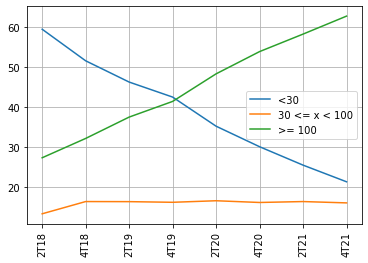

In [8]:
# Distribuzione velocità fisse
sub30_perc = pss.iloc[15].dropna()
bet30and100_perc = pss.iloc[16].dropna()
over100_perc = pss.iloc[17].dropna()

plt.xticks(rotation=90)
plt.plot(sub30_perc[1:], label = '<30')
plt.plot(bet30and100_perc[1:], label = '30 <= x < 100')
plt.plot(over100_perc[1:], label = '>= 100')
# plt.stackplot(sub30_perc[1:].index, sub30_perc[1:], bet30and100_perc[1:], over100_perc[1:], labels=['A','B','C'])
# plt.ylabel('Accessi totali broadband per tecnologia (mln)')
plt.legend()
plt.grid(True)
plt.savefig('1.3.percentuali_velocità_fisse_residenziali.svg')

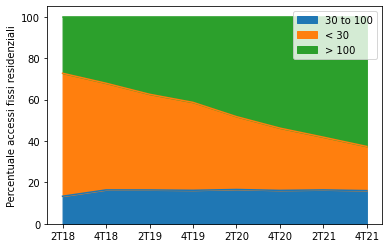

In [9]:
bet30and100_perc.name = '30 to 100'
sub30_perc.name = '< 30'
over100_perc.name = '> 100'

df = pd.concat([bet30and100_perc[1:], sub30_perc[1:], over100_perc[1:]], axis = 1)
df.plot.area()
plt.ylabel('Percentuale accessi fissi residenziali')
plt.legend(loc='upper right')
plt.savefig('1.3.percentuali_velocità_fisse_residenziali_stacked_area.svg')

In [10]:
# Traffico dati giornaliero rete fissa
tdg = pd.read_excel(xls, '1.5')
# tdg

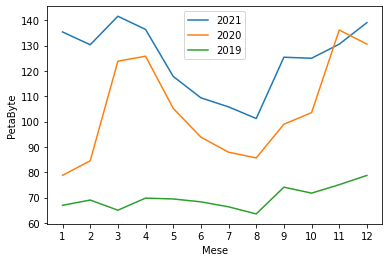

In [11]:
traff2021 = tdg.iloc[7].dropna()
traff2020 = tdg.iloc[8].dropna()
traff2019 = tdg.iloc[9].dropna()

traff2021 = traff2021.rename(lambda x: x[9:])
traff2020 = traff2020.rename(lambda x: x[9:])
traff2019 = traff2019.rename(lambda x: x[9:])

plt.plot(traff2021[1:13], label = '2021')
plt.plot(traff2020[1:13], label = '2020')
plt.plot(traff2019[1:13], label = '2019')
plt.legend()
plt.ylabel('PetaByte')
plt.xlabel('Mese')
plt.savefig('1.5.traffico_giornaliero_fisso.svg')

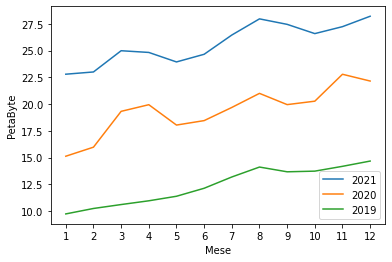

In [12]:
tdm = pd.read_excel(xls, '1.10')

traff2021_mobile = tdm.iloc[6].dropna()
traff2020_mobile = tdm.iloc[7].dropna()
traff2019_mobile = tdm.iloc[8].dropna()

traff2021_mobile = traff2021_mobile.rename(lambda x: x[9:])
traff2020_mobile = traff2020_mobile.rename(lambda x: x[9:])
traff2019_mobile = traff2019_mobile.rename(lambda x: x[9:])

plt.plot(traff2021_mobile[1:13], label = '2021')
plt.plot(traff2020_mobile[1:13], label = '2020')
plt.plot(traff2019_mobile[1:13], label = '2019')
plt.legend()
plt.ylabel('PetaByte')
plt.xlabel('Mese')
plt.savefig('1.10.traffico_giornaliero_mobile.svg')

In [13]:
####################################
# OOKLA

In [21]:
fixed_median = pd.read_csv('ookla/fixed_median.csv')
fixed_median.set_index(['Unnamed: 0'], inplace = True)
fixed_median

,0
Unnamed: 0,
Chile,200.01
Thailand,189.64
Hong Kong (SAR),181.70
Denmark,166.11
China,162.74
...,...
Syria,2.89
Yemen,2.23
Turkmenistan,2.11


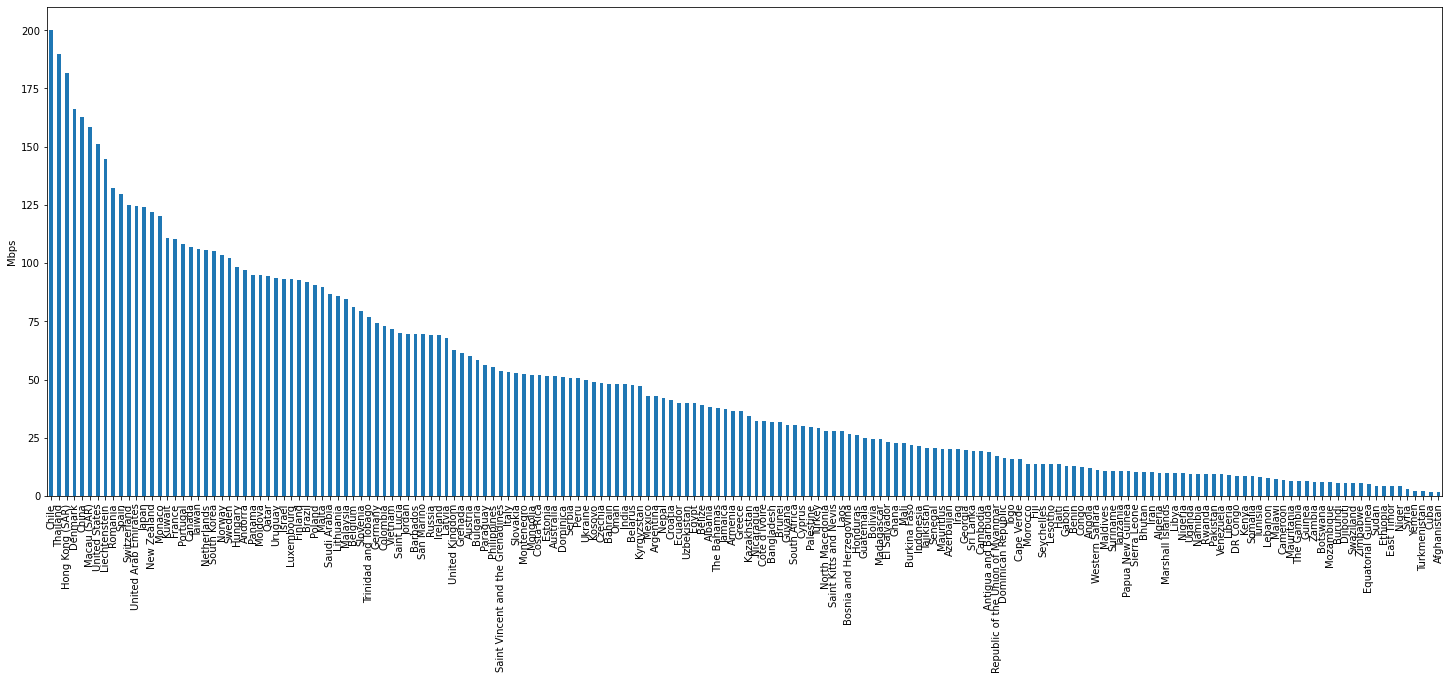

In [15]:
fixed_median.plot.bar(rot = 90, figsize = (25, 9), legend = False)
plt.ylabel('Mbps')
plt.xlabel('')
# plt.show()
plt.savefig('median_speed_all_countries.svg')

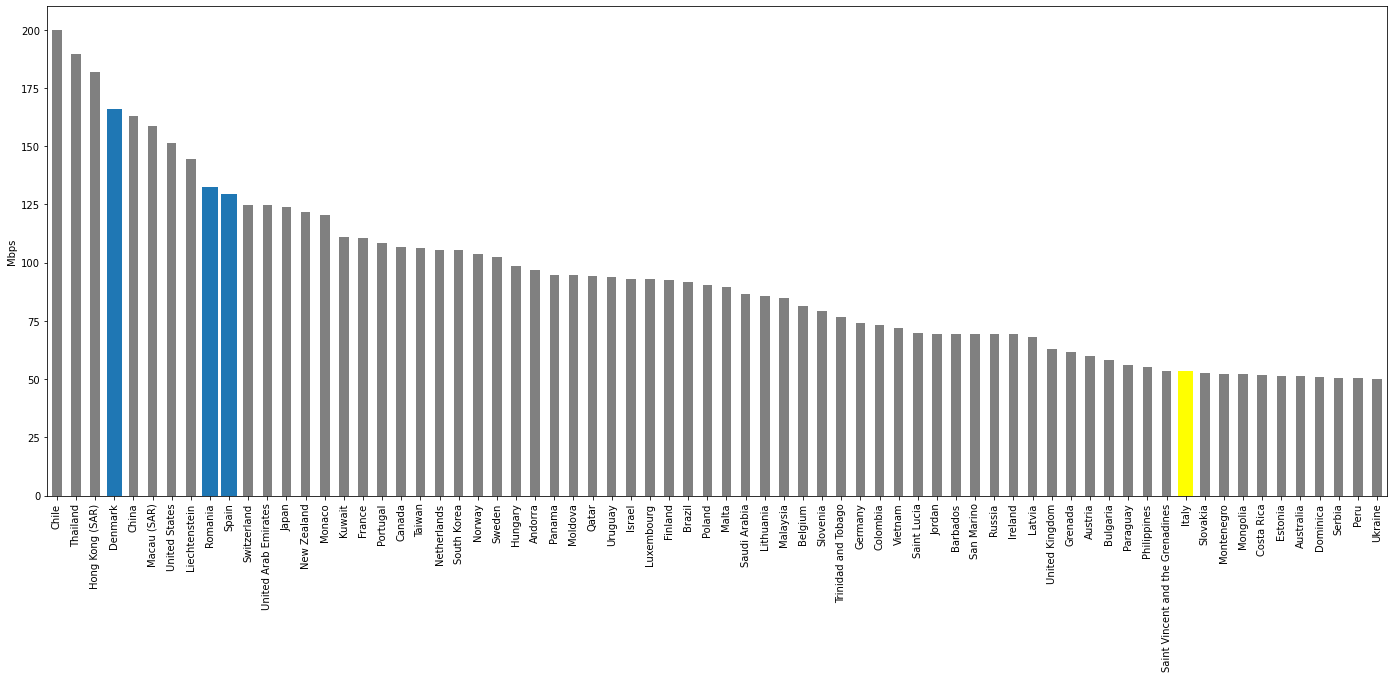

In [16]:
fixed_median_trim = fixed_median[:70]
fixed_median_trim.plot.bar(rot = 90, figsize = (24, 9), legend = False, color = 'grey')
plt.bar(3, fixed_median.loc['Denmark'], color = 'C0')
plt.bar(8, fixed_median.loc['Romania'], color = 'C0')
plt.bar(9, fixed_median.loc['Spain'], color = 'C0')
plt.bar(59, fixed_median.loc['Italy'], color = 'yellow')
plt.ylabel('Mbps')
plt.xlabel('')
# plt.show()
plt.savefig('median_speed_trim_highlight.svg', bbox_inches = 'tight')

In [20]:
mobile_median = pd.read_csv('ookla/mobile_median.csv')
mobile_median.set_index(['Unnamed: 0'], inplace = True)
mobile_median

,0
Unnamed: 0,
Qatar,129.36
Norway,116.17
South Korea,111.94
Saudi Arabia,105.42
Kuwait,105.14
...,...
Ghana,7.32
Cuba,6.43
Afghanistan,5.57


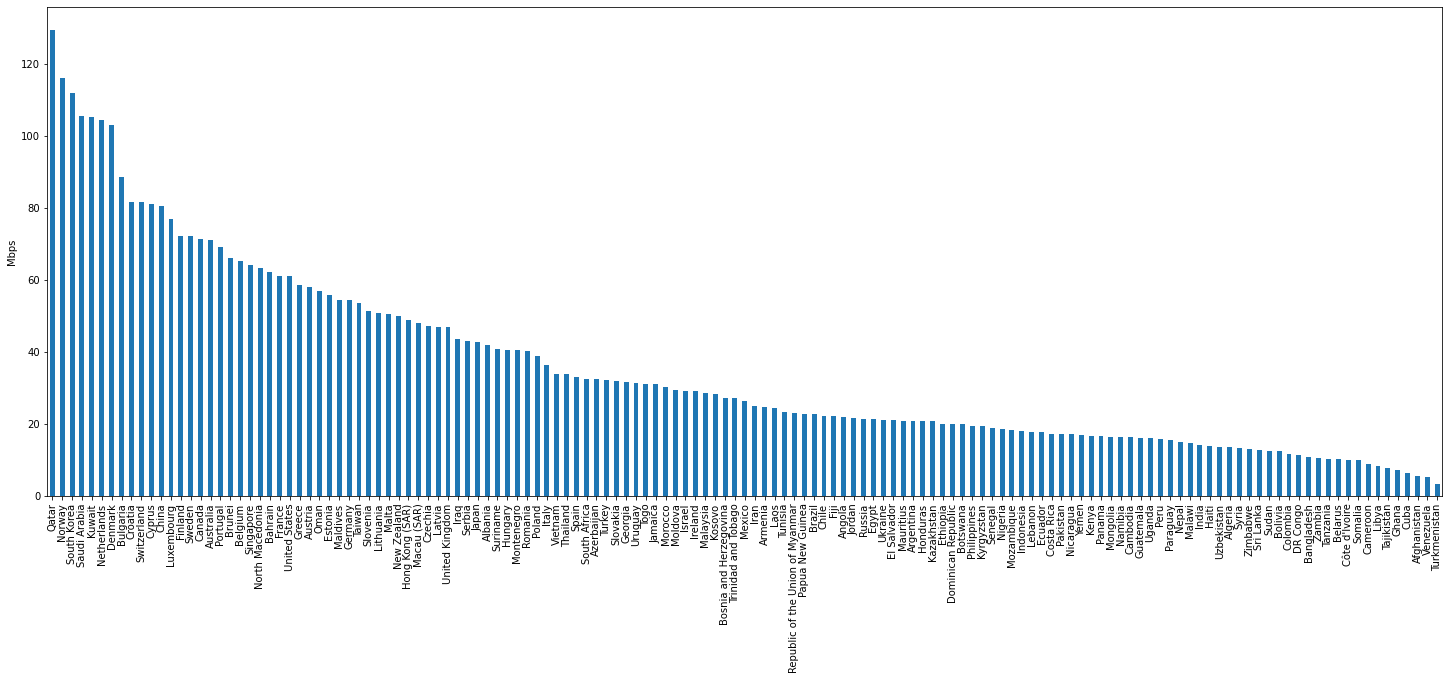

In [18]:
mobile_median.plot.bar(rot = 90, figsize = (25, 9), legend = False)
plt.ylabel('Mbps')
plt.xlabel('')
# plt.show()
plt.savefig('mobile_median_speed_all_countries.svg')

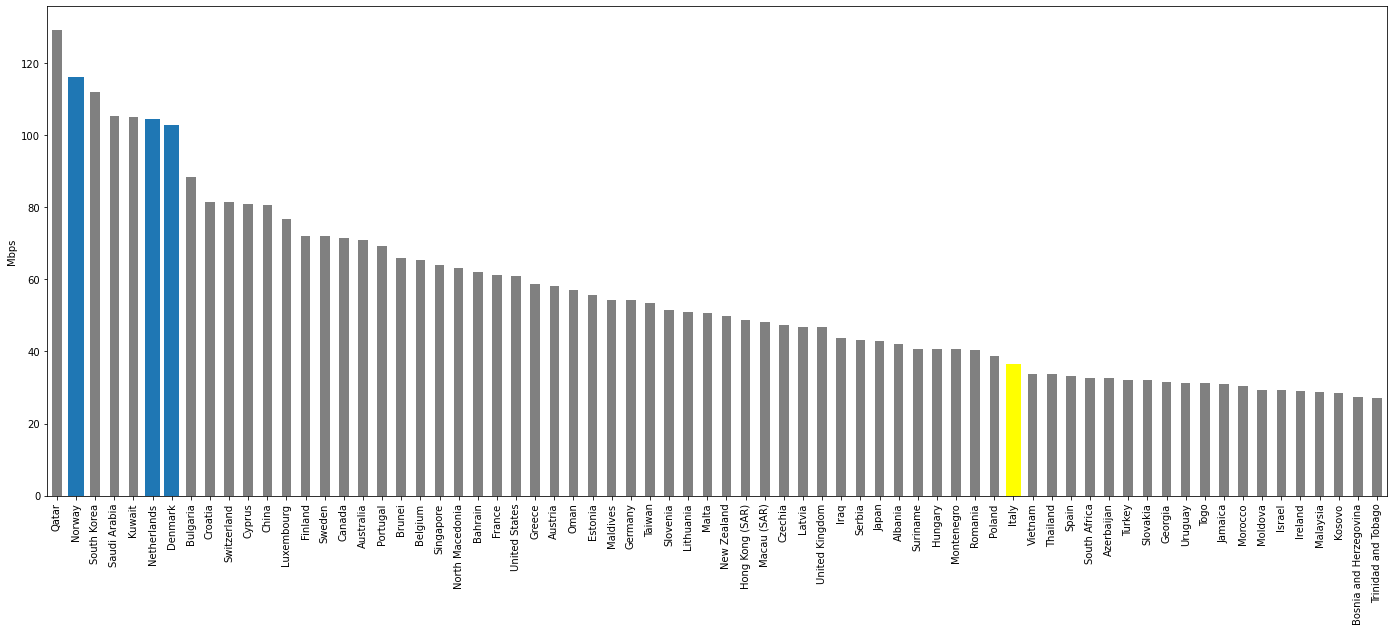

In [19]:
mobile_median_trim = mobile_median[:70]
mobile_median_trim.plot.bar(rot = 90, figsize = (24, 9), legend = False, color = 'grey')
plt.bar(1, mobile_median.loc['Norway'], color = 'C0')
plt.bar(5, mobile_median.loc['Netherlands'], color = 'C0')
plt.bar(6, mobile_median.loc['Denmark'], color = 'C0')
# plt.bar(48, mobile_median.loc['Romania'], color = 'C0')
# plt.bar(53, mobile_median.loc['Spain'], color = 'C0')
plt.bar(50, mobile_median.loc['Italy'], color = 'yellow')
plt.ylabel('Mbps')
plt.xlabel('')
# plt.show()
plt.savefig('mobile_median_speed_trim_highlight.svg', bbox_inches = 'tight')